# Plot the results of a Daedalus simulation

Before running this notebook, you need to run a simulation using `Daedalus` library. Please refer to [README](https://github.com/alan-turing-institute/daedalus/blob/master/README.md), Section: `Run Daedalus via command line`. After running the simulation, an `output` directory is created with the following structure:

```bash
output
└── E08000032
    ├── config_file_E08000032.yml
    ├── ssm_E08000032_MSOA11_ppp_2011_processed.csv
    └── ssm_E08000032_MSOA11_ppp_2011_simulation.csv
    └── year_1
          └── ssm_E08000032_MSOA11_ppp_2011_simulation_year_1.csv
    └── year_2
          └── ssm_E08000032_MSOA11_ppp_2011_simulation_year_2.csv
```

Here, we will plot the results stored in these files.

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import time

## Run re-assignment and validation

Refer to [the Evaluation section in README](https://github.com/alan-turing-institute/daedalus/blob/master/README.md#evaluation) for more information. 

In [2]:
!python ../scripts/validation.py --simulation_dir ../output --persistent_data_dir ../persistent_data

-------------------------------------------------------------
Getting pool of individuals that migrated internally between LADs
-------------------------------------------------------------

Get migrants for  year_2
Found  3105  individuals that migrated
Get migrants for  year_1
Found  1717  individuals that migrated
Found  3105  individuals that migrated
----------------------------------------------
Re-assigning inviduals that migrated to  E08000032
----------------------------------------------

Reassign for  year_2
Reassign for  year_1
-----------------------------------
Running validation for:  E08000032
-----------------------------------

sys:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
population simulation:  536806 , ONS estimation  525936
population diff:  10870 ( 2.1 %)

births simulation:  18315 , ONS estimation  16469
births diff:  1846 ( 11.2 %)

deaths simulation:  8418 , ONS estimation  8850
deaths diff:  -432 (

population simulation:  33219 , ONS estimation  29957
population diff:  3262 ( 10.9 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  1181 , ONS estimation  1125
deaths diff:  56 ( 5.0 %)

internal_in simulation:  0 , ONS estimation  581
internal_in diff:  -581 ( -100.0 %)

internal_out simulation:  888 , ONS estimation  841
internal_out diff:  47 ( 5.6 %)

international_in simulation:  131 , ONS estimation  137
international_in diff:  -6 ( -4.4 %)

international_out simulation:  185 , ONS estimation  136
international_out diff:  49 ( 36.0 %)

population simulation:  33219 , ONS estimation  29957
population diff:  3262 ( 10.9 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  615 , ONS estimation  591
deaths diff:  24 ( 4.1 %)

internal_in simulation:  0 , ONS estimation  294
internal_in diff:  -294 ( -100.0 %)

internal_out simulation:  422 , ONS estimation  401
internal_out diff:  21 ( 5.2 %)

internat

population simulation:  50446 , ONS estimation  47738
population diff:  2708 ( 5.7 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  307 , ONS estimation  312
deaths diff:  -5 ( -1.6 %)

internal_in simulation:  0 , ONS estimation  1291
internal_in diff:  -1291 ( -100.0 %)

internal_out simulation:  1614 , ONS estimation  1665
internal_out diff:  -51 ( -3.1 %)

international_in simulation:  313 , ONS estimation  267
international_in diff:  46 ( 17.2 %)

international_out simulation:  21 , ONS estimation  177
international_out diff:  -156 ( -88.1 %)

population simulation:  50446 , ONS estimation  47738
population diff:  2708 ( 5.7 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  169 , ONS estimation  161
deaths diff:  8 ( 5.0 %)

internal_in simulation:  0 , ONS estimation  604
internal_in diff:  -604 ( -100.0 %)

internal_out simulation:  848 , ONS estimation  848
internal_out diff:  0 ( 0.0 %)

inter

population simulation:  55435 , ONS estimation  54753
population diff:  682 ( 1.2 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  62 , ONS estimation  68
deaths diff:  -6 ( -8.8 %)

internal_in simulation:  0 , ONS estimation  1641
internal_in diff:  -1641 ( -100.0 %)

internal_out simulation:  2017 , ONS estimation  1969
internal_out diff:  48 ( 2.4 %)

international_in simulation:  264 , ONS estimation  448
international_in diff:  -184 ( -41.1 %)

international_out simulation:  39 , ONS estimation  440
international_out diff:  -401 ( -91.1 %)

population simulation:  55435 , ONS estimation  54753
population diff:  682 ( 1.2 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  62 , ONS estimation  68
deaths diff:  -6 ( -8.8 %)

internal_in simulation:  0 , ONS estimation  1641
internal_in diff:  -1641 ( -100.0 %)

internal_out simulation:  2017 , ONS estimation  1969
internal_out diff:  48 ( 2.4 %)

int

population simulation:  19156 , ONS estimation  19534
population diff:  -378 ( -1.9 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  4 , ONS estimation  6
deaths diff:  -2 ( -33.3 %)

internal_in simulation:  0 , ONS estimation  936
internal_in diff:  -936 ( -100.0 %)

internal_out simulation:  1080 , ONS estimation  1265
internal_out diff:  -185 ( -14.6 %)

international_in simulation:  131 , ONS estimation  323
international_in diff:  -192 ( -59.4 %)

international_out simulation:  85 , ONS estimation  210
international_out diff:  -125 ( -59.5 %)

population simulation:  19156 , ONS estimation  19534
population diff:  -378 ( -1.9 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  4 , ONS estimation  6
deaths diff:  -2 ( -33.3 %)

internal_in simulation:  0 , ONS estimation  936
internal_in diff:  -936 ( -100.0 %)

internal_out simulation:  1080 , ONS estimation  1265
internal_out diff:  -185 ( -14.6 %

population simulation:  17691 , ONS estimation  17564
population diff:  127 ( 0.7 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  25 , ONS estimation  10
deaths diff:  15 ( 150.0 %)

internal_in simulation:  0 , ONS estimation  2213
internal_in diff:  -2213 ( -100.0 %)

internal_out simulation:  2492 , ONS estimation  2400
internal_out diff:  92 ( 3.8 %)

international_in simulation:  1255 , ONS estimation  871
international_in diff:  384 ( 44.1 %)

international_out simulation:  742 , ONS estimation  617
international_out diff:  125 ( 20.3 %)

population simulation:  17691 , ONS estimation  17564
population diff:  127 ( 0.7 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  12 , ONS estimation  6
deaths diff:  6 ( 100.0 %)

internal_in simulation:  0 , ONS estimation  1122
internal_in diff:  -1122 ( -100.0 %)

internal_out simulation:  1253 , ONS estimation  1213
internal_out diff:  40 ( 3.3 %)

inter

population simulation:  15188 , ONS estimation  13339
population diff:  1849 ( 13.9 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  4 , ONS estimation  2
deaths diff:  2 ( 100.0 %)

internal_in simulation:  0 , ONS estimation  876
internal_in diff:  -876 ( -100.0 %)

internal_out simulation:  902 , ONS estimation  1184
internal_out diff:  -282 ( -23.8 %)

international_in simulation:  553 , ONS estimation  131
international_in diff:  422 ( 322.1 %)

international_out simulation:  100 , ONS estimation  83
international_out diff:  17 ( 20.5 %)

population simulation:  17203 , ONS estimation  17622
population diff:  -419 ( -2.4 %)

births simulation:  0 , ONS estimation  0
births diff:  0 ( nan %)

deaths simulation:  13 , ONS estimation  11
deaths diff:  2 ( 18.2 %)

internal_in simulation:  0 , ONS estimation  2996
internal_in diff:  -2996 ( -100.0 %)

internal_out simulation:  2815 , ONS estimation  3121
internal_out diff:  -306 ( -9.8 %)

in

## Read re-assigned population file

In [3]:
pop = pd.read_csv('../output/E08000032/ssm_E08000032_MSOA11_ppp_2011_simulation_reassigned.csv')
print(f"Number of rows: {len(pop)}")
pop.head()

/Users/khosseini/myJobs/ATI/Projects/2019/SPENCER/vivarium_public_health_spenser/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of rows: 551664


,Unnamed: 0,Unnamed: 0.1,tracked,immigrated,emigrated,cause_of_death,years_of_life_lost,previous_MSOA_locations,previous_LAD_locations,last_outmigration_time,...,age,location,sex,exit_time,entrance_time,last_birth_time,parent_id,age_bucket,duplicate,internal_migration_in
0,0,0,True,no_immigration,no_emigration,not_dead,0.0,NaN,NaN,NaN,...,3.00137,E08000032,1.0,NaN,2010-12-01 13:30:00,NaN,-1,0to15,False,No
1,1,1,True,no_immigration,no_emigration,not_dead,0.0,NaN,NaN,NaN,...,3.00137,E08000032,1.0,NaN,2010-12-01 13:30:00,NaN,-1,0to15,False,No
2,2,2,True,no_immigration,no_emigration,not_dead,0.0,NaN,NaN,NaN,...,3.00137,E08000032,1.0,NaN,2010-12-01 13:30:00,NaN,-1,0to15,False,No
3,3,3,True,no_immigration,no_emigration,not_dead,0.0,NaN,NaN,NaN,...,3.00137,E08000032,1.0,NaN,2010-12-01 13:30:00,NaN,-1,0to15,False,No
4,4,4,True,no_immigration,no_emigration,not_dead,0.0,NaN,NaN,NaN,...,3.00137,E08000032,1.0,NaN,2010-12-01 13:30:00,NaN,-1,0to15,False,No


In [4]:
# print some summary stats on the simulation
print('alive..................', len(pop[pop['alive'] == 'alive']))
print('dead...................', len(pop[pop['alive'] == 'dead']))
print('emigrated..............', len(pop[pop['alive'] == 'emigrated']))
print('immigrants.............', len(pop[pop['immigrated'] == 'Yes']))
print('internal migration.....', len(pop[pop['internal_outmigration'] == 'Yes']))
print('new children...........', len(pop[pop['parent_id'] != -1]))

alive.................. 539883
dead................... 8797
emigrated.............. 2984
immigrants............. 8904
internal migration..... 32620
new children........... 18547


## Plots

In [5]:
# Min/Max of datetimes in the dataframe
print(f'Min/Max entrance time: {pop["entrance_time"].min()} and {pop["entrance_time"].max()}')
print(f'Max exit time:         {pop["exit_time"].dropna().max()}')

Min/Max entrance time: 2010-12-01 13:30:00 and 2012-12-01 01:30:00
Max exit time:         2012-12-31 12:00:00


In [6]:
# Adjust the min and max dates for plotting (see the previous cell)
min_time = "2011-01-01"
max_time = datetime.datetime.strptime("2013-01-01", "%Y-%m-%d")

print("min_time:", min_time)
print("max_time:", max_time)

min_time: 2011-01-01
max_time: 2013-01-01 00:00:00


In [7]:
# --- input
# intervals for plotting (in days)
interval_in_days = 30.4375
# --- 

time_axis = []
curr_pop_axis = []
alive_pop_axis = []
dead_pop_axis = []
emig_pop_axis = []
immg_pop_axis = []
internal_mig_pop_axis = []
new_babies_axis = []
avg_age_axis = []

curr_time = datetime.datetime.strptime(min_time, "%Y-%m-%d")
while curr_time <= max_time:
    time_axis.append(curr_time)
    
    # population in the current time step
    curr_pop = pop[pop["entrance_time"] <= curr_time.strftime("%Y-%m-%d")]
    
    alive_pop = curr_pop[curr_pop['alive'] == 'alive'] 
    # For dead/emigrant populations, we need to consider both "alive" and "exit_time" columns
    dead_pop = curr_pop[(curr_pop["exit_time"] <= curr_time.strftime("%Y-%m-%d")) & 
                        (curr_pop["alive"] == "dead")]
    emig_pop = curr_pop[(curr_pop["exit_time"] <= curr_time.strftime("%Y-%m-%d")) & 
                        (curr_pop["alive"] == "emigrated")]
    
    immg_pop = curr_pop[curr_pop["immigrated"] == "Yes"]

    internal_mig_pop = curr_pop[(curr_pop["internal_outmigration"] == "Yes") &
                                (curr_pop["last_outmigration_time"] <= curr_time.strftime("%Y-%m-%d"))]
    
    new_babies = curr_pop[curr_pop["parent_id"] != -1]
    
    curr_pop_axis.append(len(curr_pop))
    alive_pop_axis.append(len(alive_pop))
    dead_pop_axis.append(len(dead_pop))
    emig_pop_axis.append(len(emig_pop))
    immg_pop_axis.append(len(immg_pop))
    internal_mig_pop_axis.append(len(internal_mig_pop))
    new_babies_axis.append(len(new_babies))
    
    avg_age_axis.append(alive_pop["age"].mean())
    
    # go to next time, according to the selected interval_in_days
    curr_time = datetime.datetime.strptime(curr_time.strftime("%Y-%m-%d"), "%Y-%m-%d")
    curr_time += datetime.timedelta(days=interval_in_days)

In [8]:
# Convert all lists to numpy arrays
curr_pop_axis = np.array(curr_pop_axis)
alive_pop_axis = np.array(alive_pop_axis)
dead_pop_axis = np.array(dead_pop_axis)
emig_pop_axis = np.array(emig_pop_axis)
immg_pop_axis = np.array(immg_pop_axis)
internal_mig_pop_axis = np.array(internal_mig_pop_axis)
new_babies_axis = np.array(new_babies_axis)
avg_age_axis = np.array(avg_age_axis)

In [9]:
# collect different populations (regarless of time)
pop_dead = pop[pop['alive'] == 'dead']
pop_emmig = pop[pop['alive'] == 'emigrated']
pop_immig = pop[pop["immigrated"] == "Yes"]
pop_internal = pop[pop['internal_outmigration'] == "Yes"]
pop_new_babies = pop[pop["parent_id"] != -1]

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

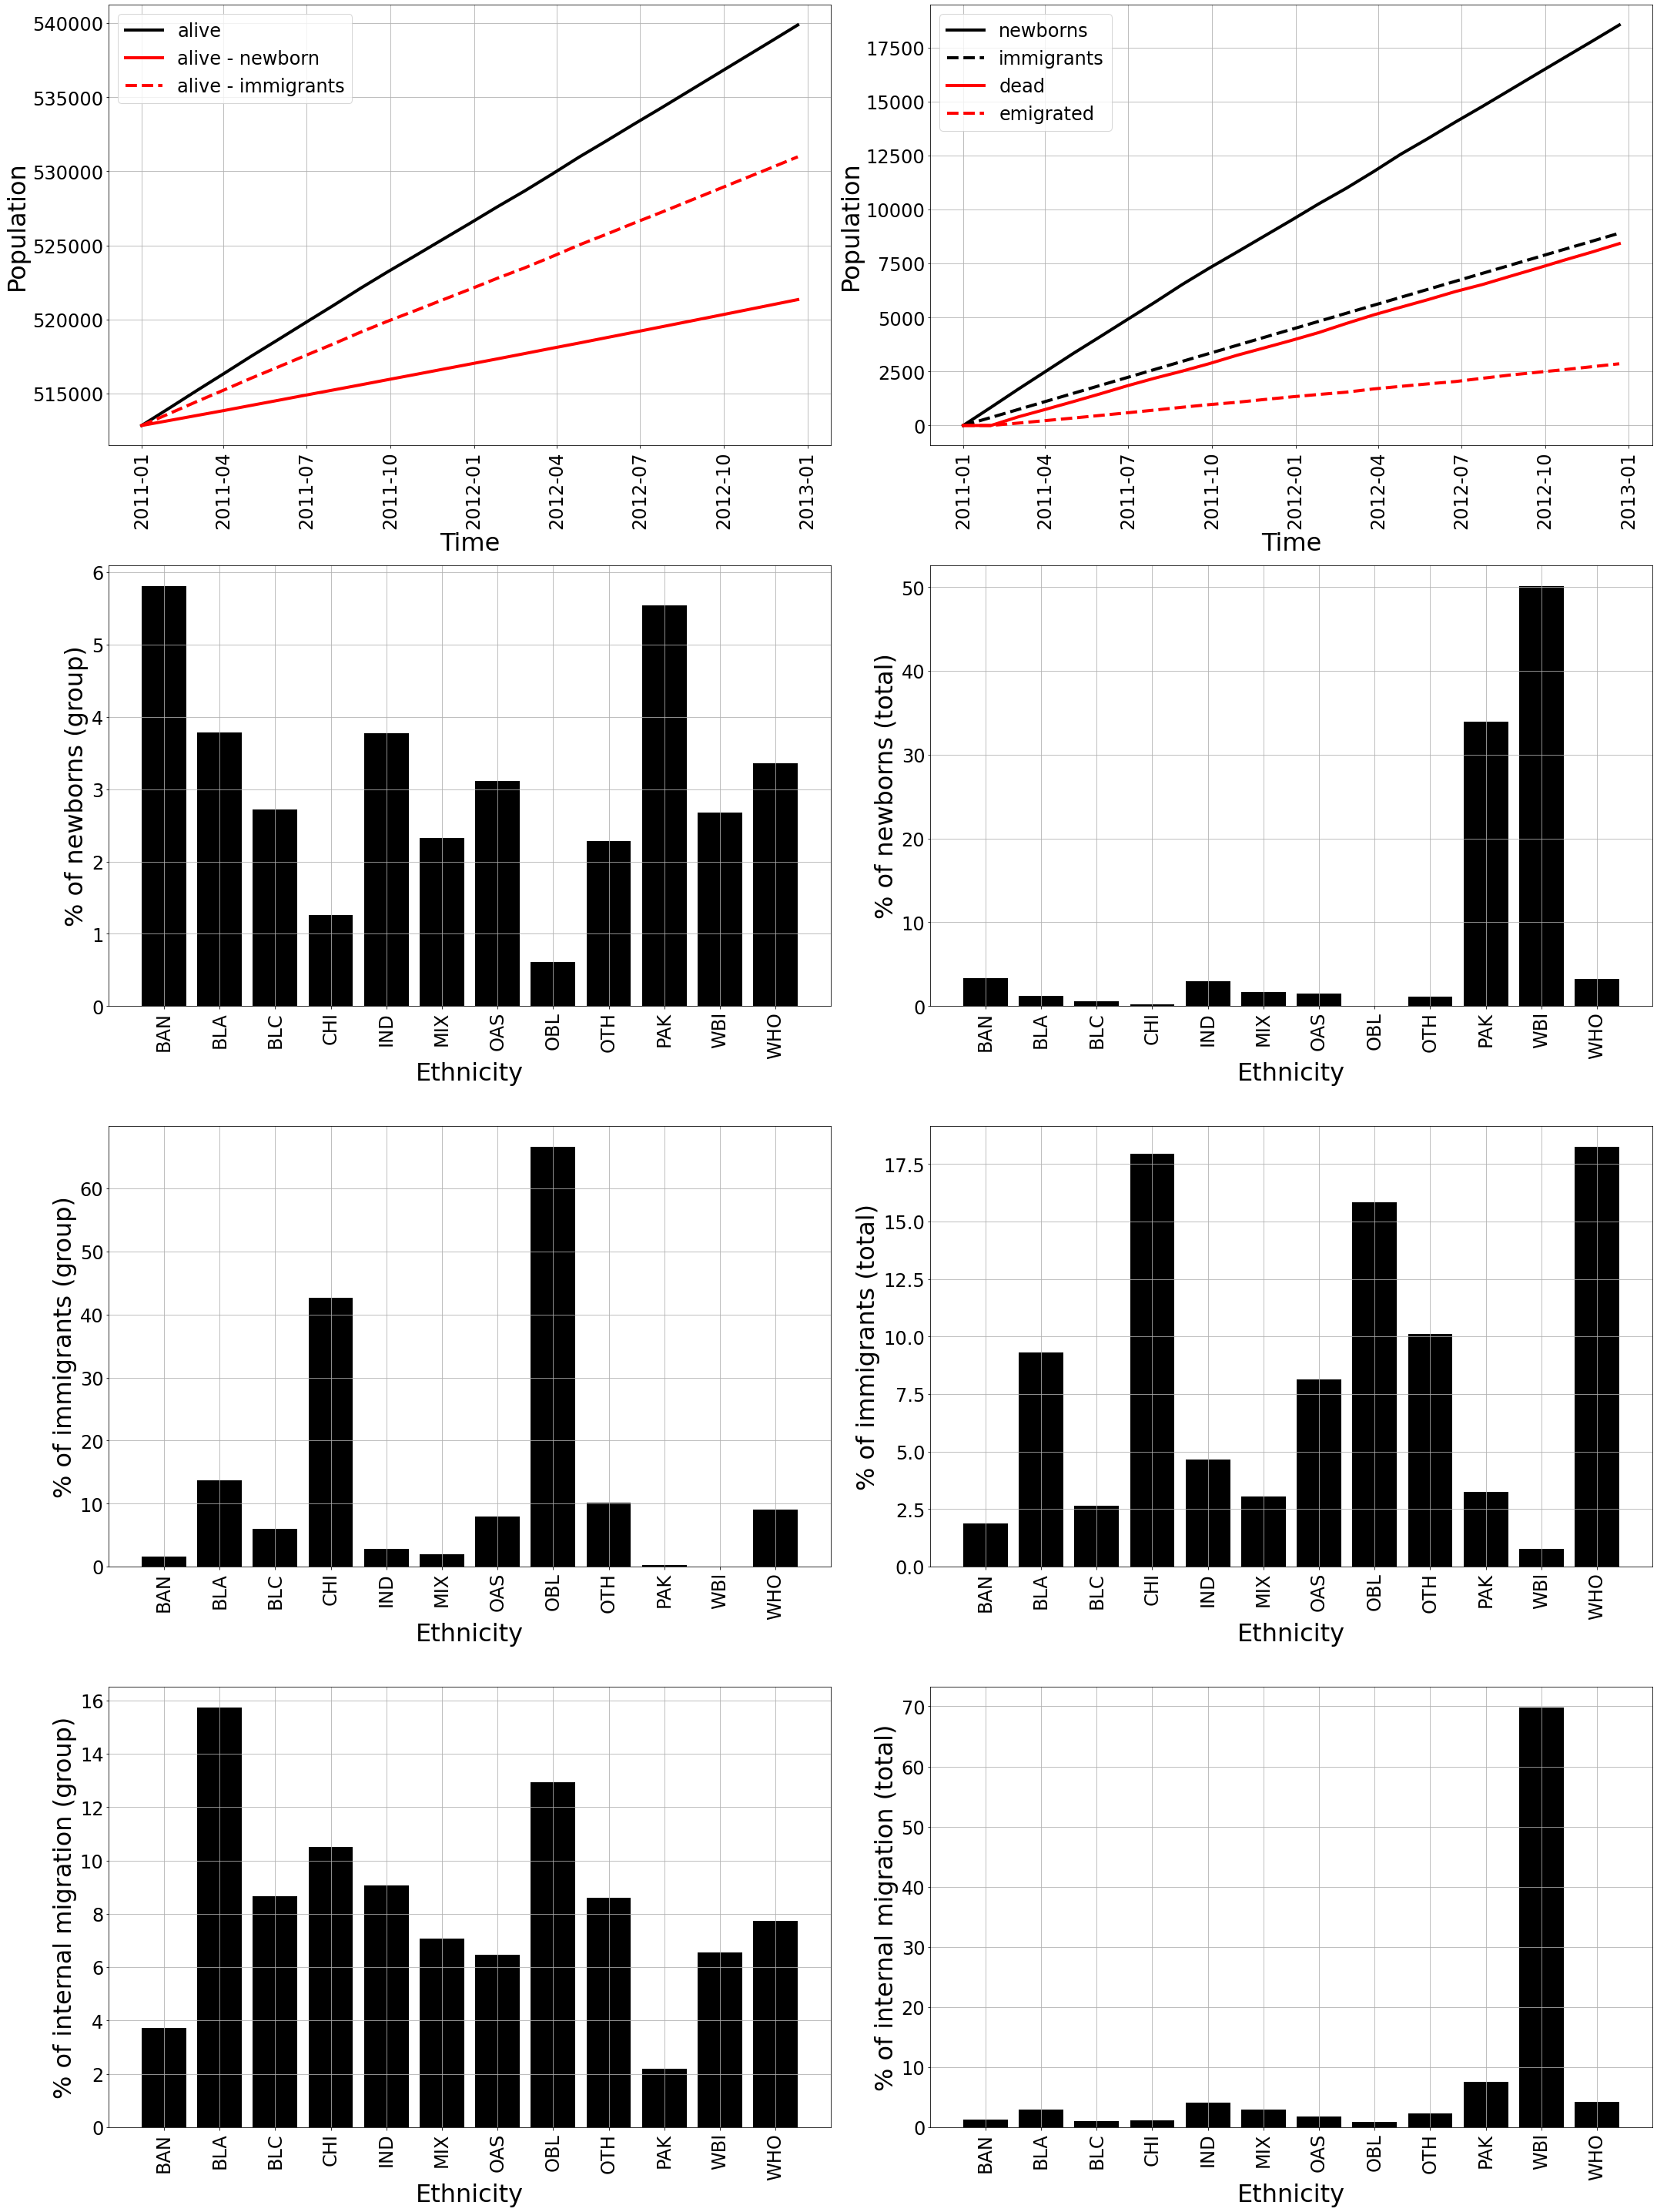

In [11]:
plt.figure(figsize=(30, 40))

# number of rows/columns in the figure
n_rows = 4
n_cols = 2

# ------ subplot 1
plt.subplot(n_rows, n_cols, 1)
plt.plot(time_axis, alive_pop_axis, 
         c='k', lw=4, label="alive")

plt.plot(time_axis, alive_pop_axis - new_babies_axis, 
         c='r', lw=4, ls="-", label="alive - newborn")

plt.plot(time_axis, alive_pop_axis - immg_pop_axis, 
         c='r', lw=4, ls="--", label="alive - immigrants")

plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)

# ------ subplot 2
plt.subplot(n_rows, n_cols, 2)
plt.plot(time_axis, new_babies_axis, 
         c='k', lw=4, label="newborns")

plt.plot(time_axis, immg_pop_axis, 
         c='k', lw=4, ls='--', label="immigrants")

plt.plot(time_axis, dead_pop_axis, 
         c='r', lw=4, label="dead")

plt.plot(time_axis, emig_pop_axis, 
         c='r', lw=4, ls='--', label="emigrated")

plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)

# ------ subplot 3
plt.subplot(n_rows, n_cols, 3)
series2plot = pop_new_babies['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of newborns (group)", size=32)

plt.grid()

# ------ subplot 4
plt.subplot(n_rows, n_cols, 4)
series2plot = pop_new_babies['ethnicity'].value_counts().sort_index() / len(pop_new_babies["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of newborns (total)", size=32)

plt.grid()

# ------ subplot 5
plt.subplot(n_rows, n_cols, 5)
series2plot = pop_immig['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of immigrants (group)", size=32)

plt.grid()


# ------ subplot 6
plt.subplot(n_rows, n_cols, 6)
series2plot = pop_immig['ethnicity'].value_counts().sort_index() / len(pop_immig["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of immigrants (total)", size=32)

plt.grid()


# ------ subplot 7
plt.subplot(n_rows, n_cols, 7)
series2plot = pop_internal['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of internal migration (group)", size=32)

plt.grid()


# ------ subplot 8
plt.subplot(n_rows, n_cols, 8)
series2plot = pop_internal['ethnicity'].value_counts().sort_index() / len(pop_internal["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of internal migration (total)", size=32)

plt.grid()

#plt.legend(fontsize=24)
plt.tight_layout()
plt.show()

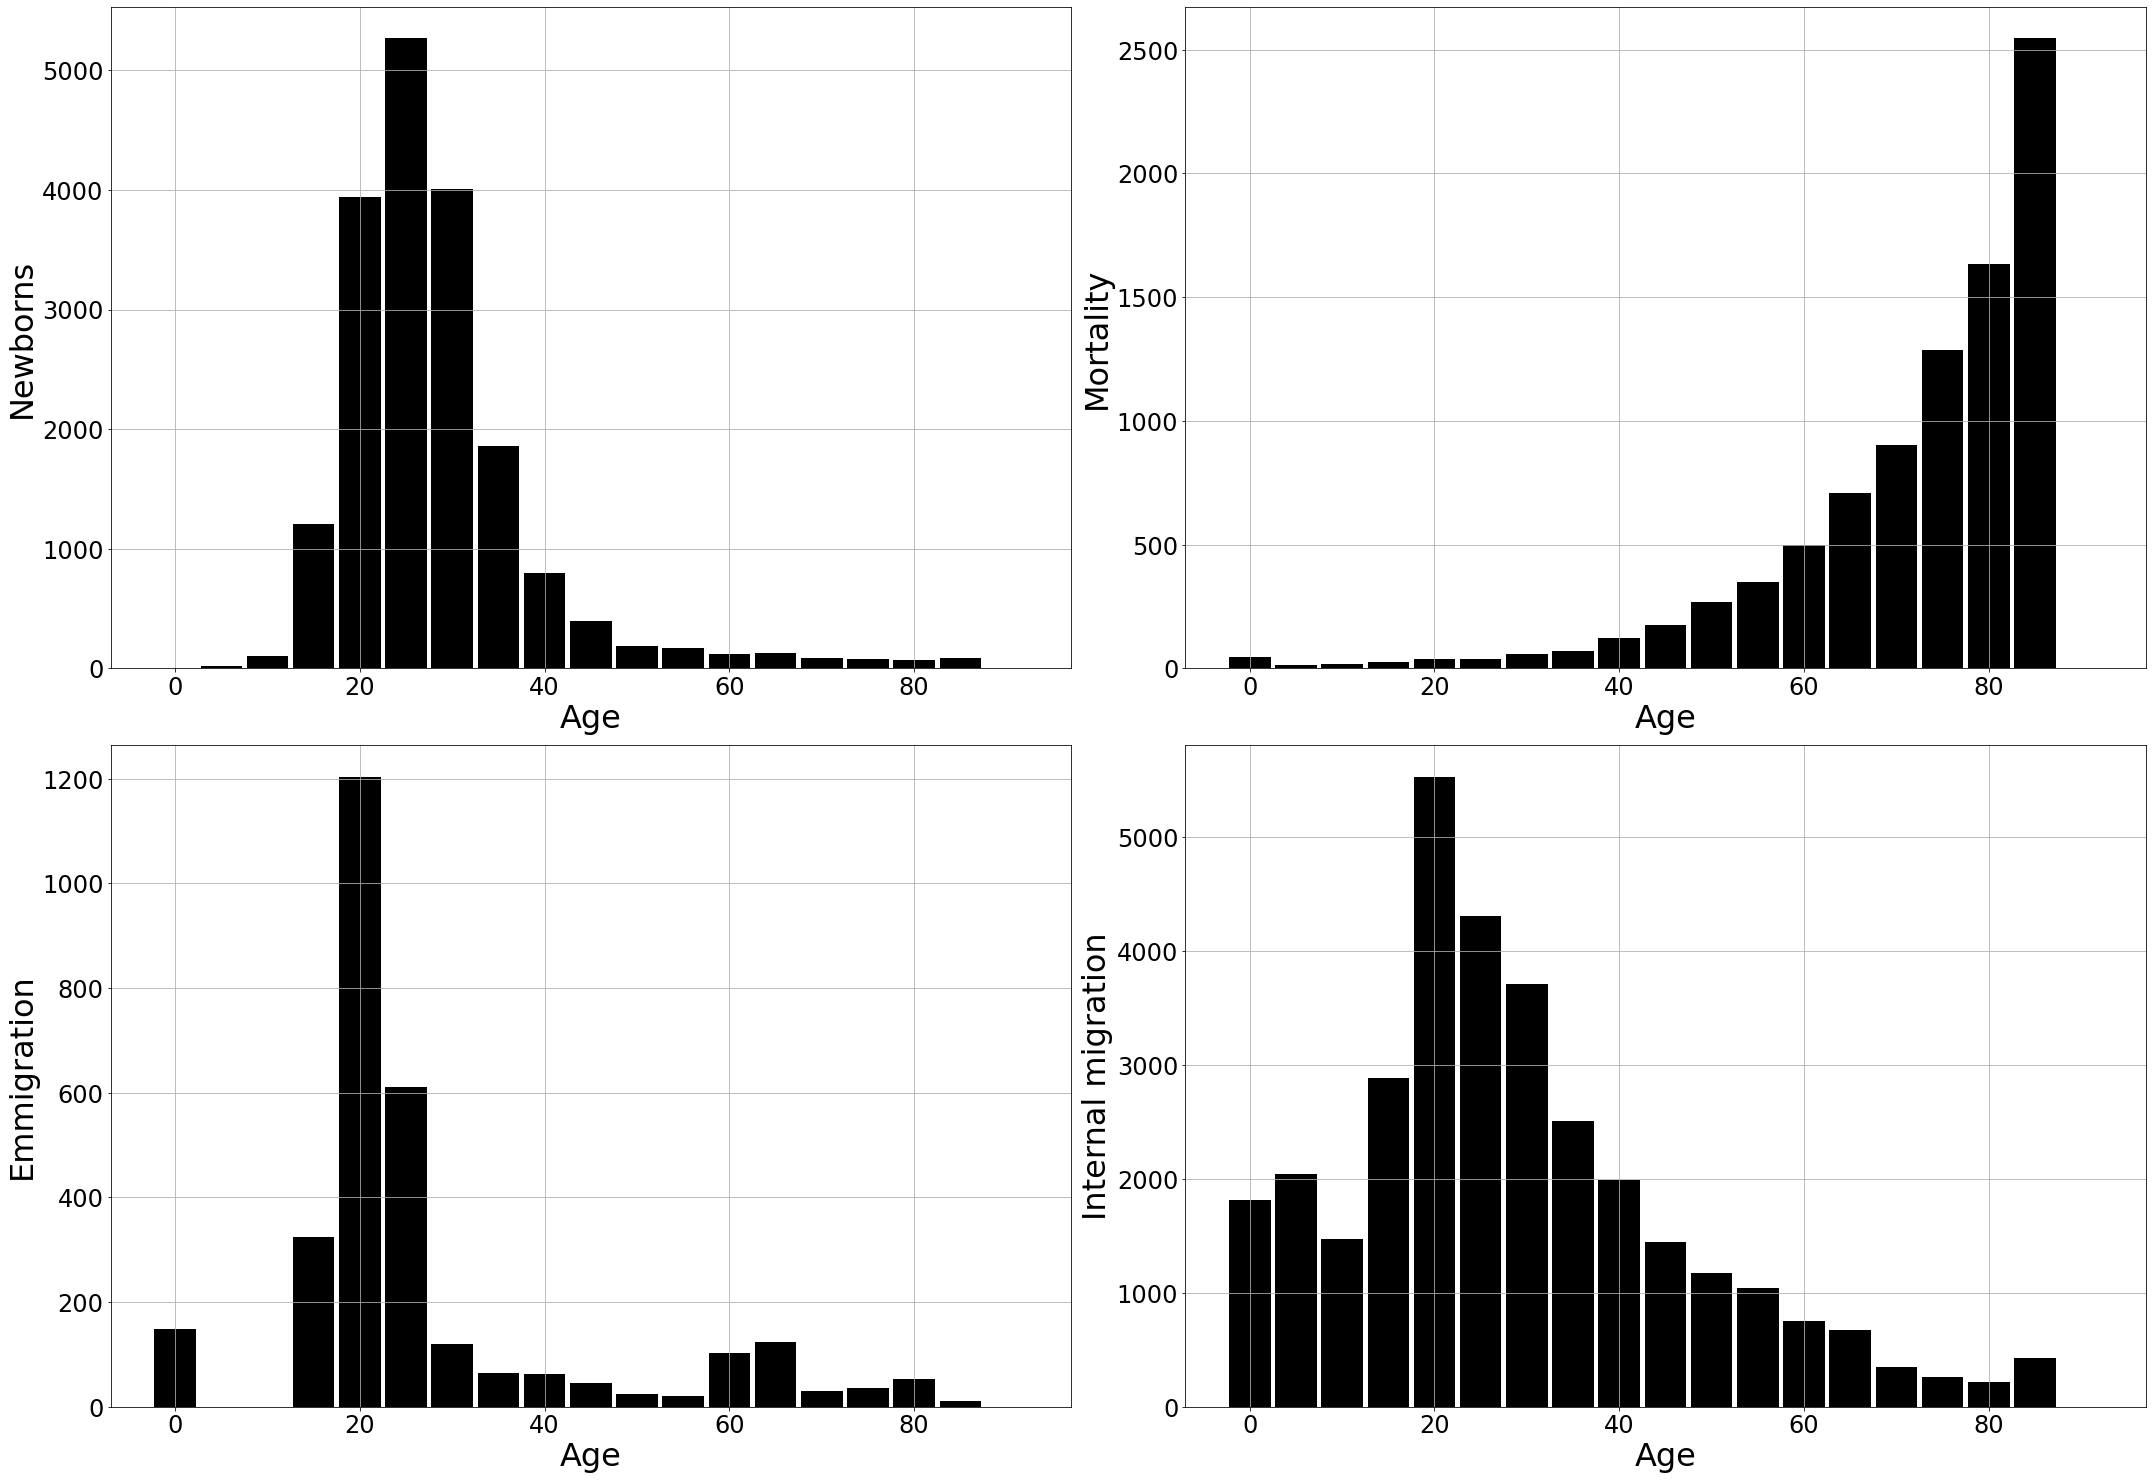

In [12]:
plt.figure(figsize=(30, 30))

# ------ subplot 1
plt.subplot(3, 2, 1)
pop.iloc[pop_new_babies["parent_id"]]["age"].hist(bins=range(0, 100, 5), 
                                                  rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Newborns", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

# ------ subplot 2
plt.subplot(3, 2, 2)
pop_dead["age"].hist(bins=range(0, 100, 5), 
                     rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Mortality", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

# ------ subplot 3
plt.subplot(3, 2, 3)
pop_emmig["age"].hist(bins=range(0, 100, 5), 
                      rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Emmigration", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

# ------ subplot 4
plt.subplot(3, 2, 4)
pop_internal["age"].hist(bins=range(0, 100, 5), 
                         rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Internal migration", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

plt.tight_layout()
plt.show()